In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## I. Datasets Overview
* For data.csv file, there are totally 151112 rows and 11 columns
* For data.csv file, there are 5 numeric (int and float) columns, 2 datetime columns and 4 object columns
* For ip.csv file, there are totally 138846 rows and 3 columns
* For ip.csv file, there arr 2 numeric (int and float) columns and 1 object column
* There are no NA value in both datasets

In [2]:
df = pd.read_csv('data.csv', parse_dates=['signup_time', 'purchase_time'])
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [4]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [5]:
df_ip = pd.read_csv('ip.csv')
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
df_ip.isna().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

## II. Data Processing
### i. Find the corresponding country
* Based on the ip address from data.csv file, find the corresponding country in the ip.csv file

In [8]:
# Create a function to find the corresponding country from the ip table

def ip_to_country(ip, table):
    country = ''
    masked = table[(table['lower_bound_ip_address'] <= ip) &
                  (table['upper_bound_ip_address'] >= ip)]
    
    if len(masked) == 1:
        country = masked['country'].values[0]
    
    else:
        country = 'NA'
        
    return country

In [9]:
df['country'] = df['ip_address'].apply(lambda x: ip_to_country(x, df_ip))

In [10]:
df[['user_id', 'ip_address', 'country']].head(10)

,user_id,ip_address,country
0,22058,7.327584e+08,Japan
1,333320,3.503114e+08,United States
2,1359,2.621474e+09,United States
3,150084,3.840542e+09,NA
4,221365,4.155831e+08,United States
5,159135,2.809315e+09,Canada
6,50116,3.987484e+09,NA
7,360585,1.692459e+09,United States
8,159045,3.719094e+09,China
9,182338,3.416747e+08,United States


### ii. Extract more information from datetime columns
* Extract year, month, day and weekday information from datetime columns

In [11]:
df['sign_up_year'] = df['signup_time'].apply(lambda x: x.year)
df['sign_up_month'] = df['signup_time'].apply(lambda x: x.month)
df['sign_up_day'] = df['signup_time'].apply(lambda x: x.day)
df['sign_up_weekday'] = df['signup_time'].apply(lambda x: x.weekday())

In [12]:
df['purchase_year'] = df['purchase_time'].apply(lambda x: x.year)
df['purchase_month'] = df['purchase_time'].apply(lambda x: x.month)
df['purchase_day'] = df['purchase_time'].apply(lambda x: x.day)
df['purchase_weekday'] = df['purchase_time'].apply(lambda x: x.weekday())

In [13]:
df['time_delta'] = df['purchase_time'] - df['signup_time']
df['time_delta'] = df['time_delta'].apply(lambda x: x.total_seconds())

## III. Exploratory Data Analysis - *without ids*
### i. Categorical columns

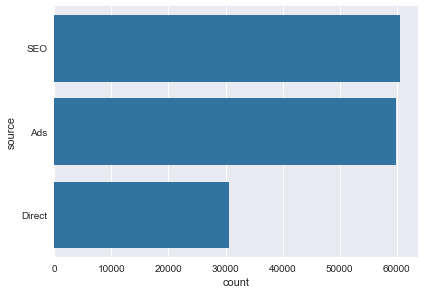

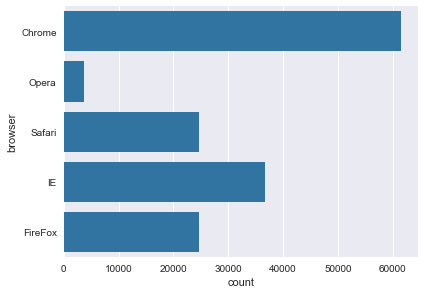

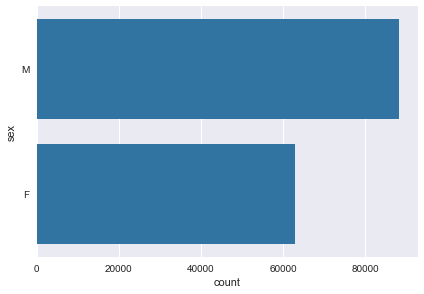

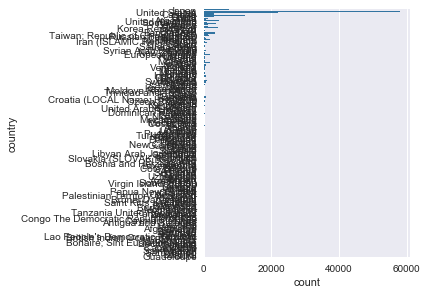

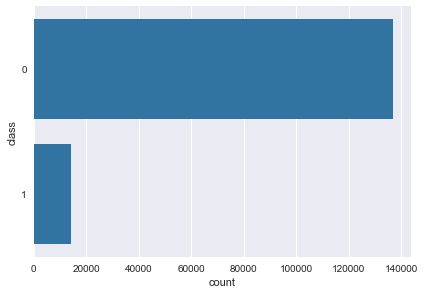

In [14]:
# Visualize the distributions of the categorical columns

plt.style.use('seaborn')
cat_cols = ['source', 'browser', 'sex', 'country','class']

for col in cat_cols:
    sns.catplot(y=col, data=df, kind='count', color='tab:blue', height=4, aspect=1.5)

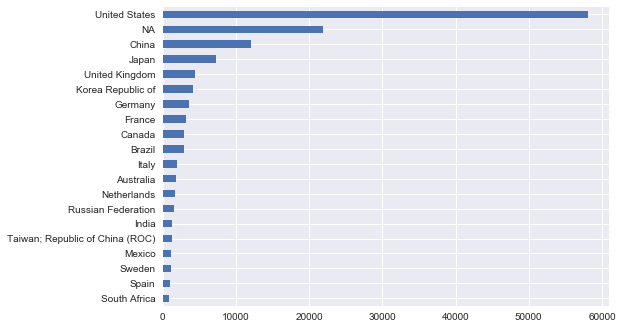

In [15]:
# The previous plot for the country distribution is messy, so create another one with just top 20

plt.style.use('seaborn')
df['country'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')

### ii. Numerical columns

In [16]:
num_cols = ['purchase_value', 'age', 
            'sign_up_year', 'sign_up_month', 'sign_up_day', 'sign_up_weekday',
           'purchase_year', 'purchase_month', 'purchase_day', 'purchase_weekday',
           'time_delta']

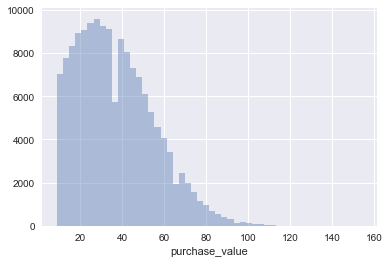

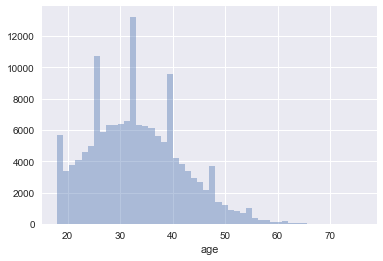

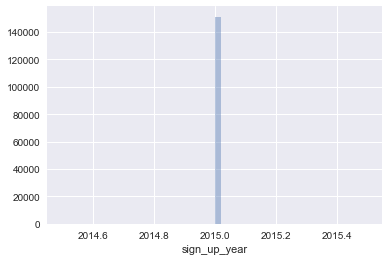

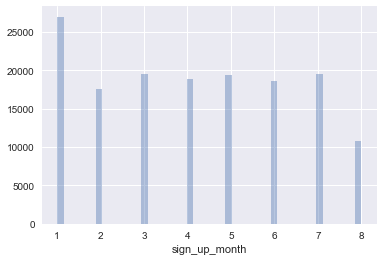

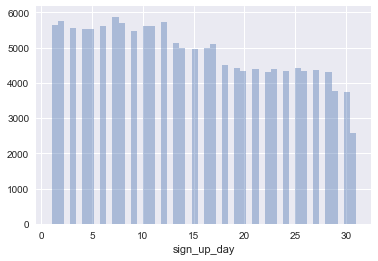

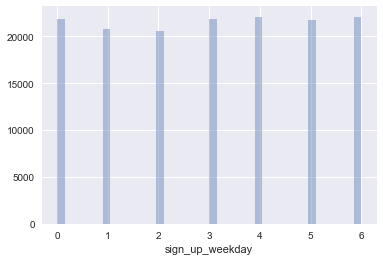

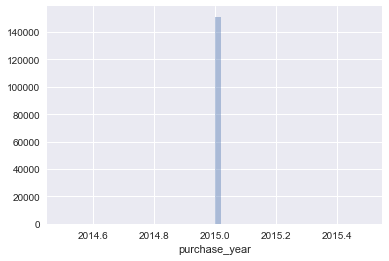

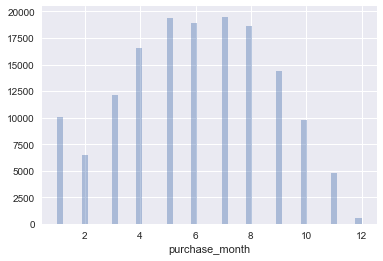

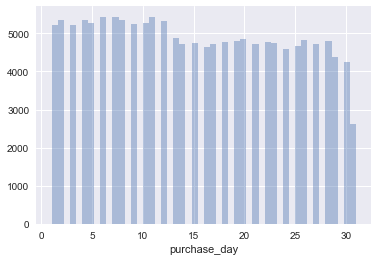

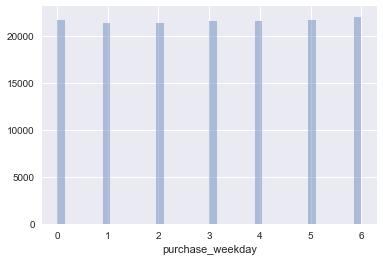

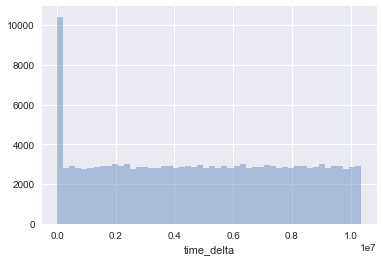

In [17]:
# Visualize the distributions of the numeric columns

plt.style.use('seaborn')
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.distplot(df[col], kde=False)

## IV. Exploratory data analysis - *ids*

### i. Find repeating user id and device id
* There is no repeating user id
* There are 137956 repeating device ids, suggesting some shared devices

In [18]:
# Find the number of unique values for user_id

'There are {0} of unique user ids out of {1} user ids'.format(
    df['user_id'].unique().shape[0], 
    df['user_id'].shape[0])

'There are 151112 of unique user ids out of 151112 user ids'

In [19]:
'There is {} repeating user id'.format(
    df['user_id'].shape[0] - df['user_id'].unique().shape[0])

'There is 0 repeating user id'

In [20]:
# Find the number of unique values for device_id

'There are {0} of unique device ids out of {1} device ids'.format(
    df['device_id'].unique().shape[0], 
    df['device_id'].shape[0])

'There are 137956 of unique device ids out of 151112 device ids'

In [21]:
'There are {} repeating device ids'.format(
    df['device_id'].shape[0] - df['device_id'].unique().shape[0])

'There are 13156 repeating device ids'

In [22]:
# Check the repeating device_id

df['device_id'].value_counts()

EQYVNEGOFLAWK    20
ITUMJCKWEYNDD    20
ZUSVMDEZRBDTX    20
CQTUVBYIWWWBC    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
EGLGSEGYPMMAM    19
SDJQRPKXQFBED    19
BWSMVSLCJXMCM    19
IGKYVZDBEGALB    19
CDFXVYHOIHPYP    19
OGBNHQHDZLGFZ    18
XJWEQEWCBRAKD    18
QVMVTZOIJDKNR    18
UFBULQADXSSOG    18
XHZBVWFWHSGTQ    18
TAODVYWZTHMTO    18
GTIYVLCMAYBFA    18
FFWAQIABHGYJC    18
RWZCXZTQUORQL    18
KPAAACGRQWYIK    18
SUEKLSZWLASFR    17
KGXODJJIWSJJE    17
IRVIFDVZMRXOU    17
UHCAPOHBEBXJW    17
QRMOMDDTIIUVW    17
KYVPIVGZBEXNK    17
NMCSWSCOZQJUP    17
FHNLMUKPGJGPZ    17
BTHAZGNCVFIVZ    17
                 ..
RSUBATBTHFIIV     1
FSNITGQQSDQFV     1
TMZLCIPBNZUPE     1
RIHGUTFPJLTGV     1
MPEZOANMEZFYG     1
GVEDJBFVIMKBV     1
CEVILNZXIUQVI     1
NSTTTGTJPIHHK     1
QTGJRZEZAPHPH     1
ADCXNHROIQJDT     1
SDCXKXKRMVOZF     1
MAQSKAGPZBTKP     1
QPJSFWULSNDJM     1
VOXWGBCZTRQKG     1
SONDIAMUADXDJ     1
AMEGPSKYYBWWC     1
XTJEQHDTVKIJM     1
XESMQNPXAPDNV     1
MJNXYRAYBIGQT     1


### ii. Create an additional column for user number of shared devices

In [23]:
# Create a dataframe with device_id and the number of user_id that share the same device_id

df_sharing = pd.pivot_table(df, index='device_id', values='user_id', aggfunc='count').reset_index()

In [24]:
# Perform inner join to merge the two dataframes

df = pd.merge(df, df_sharing, left_on='device_id', right_on='device_id', how='inner', suffixes=('','_count'))

## V. Build ML model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### i. Select features for ML

In [26]:
features = ['purchase_value', 'source', 'browser', 'sex', 'age', 'country', 
            'sign_up_month', 'sign_up_day', 'sign_up_weekday',
           'purchase_month', 'purchase_day', 'purchase_weekday',
           'time_delta', 'user_id_count']

In [27]:
X = df[features]
y = df['class']

### ii. Perform one-hot encoding & Train/Test split

In [28]:
X = pd.get_dummies(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### iii. Create model & Hyper-parameter tuning
* Select **Random Forest Classifier** as the ML model
* For **n_estimators** scan, the optimal value is 70
* For **max_depth** scan, the optimal value is 10

In [30]:
# Scan the n_estimators on the training/testing set, with max_depth = 10 

scan_train_d10 = []
scan_test_d10 = []
    
for n in range(10, 100, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=2)
    cv = cross_validate(rf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=3)
    train_auc = np.mean(cv['train_score'])
    test_auc = np.mean(cv['test_score'])
    scan_train_d10.append(train_auc)
    scan_test_d10.append(test_auc)

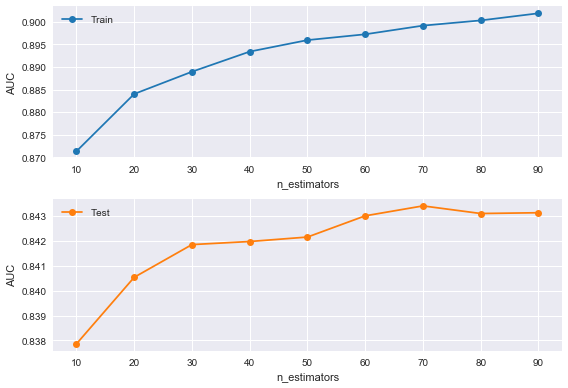

In [31]:
plt.style.use('seaborn')
plt.subplot(2,1,1)
plt.plot(np.arange(10,100,10), scan_train_d10, '-o', label='Train', c='tab:blue')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()

plt.subplot(2,1,2)
plt.plot(np.arange(10,100,10), scan_test_d10, '-o', label='Test', c='tab:orange')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()

In [32]:
# Scan the max_depth on the training/testing set, with n_estimators = 70

scan_train_n70 = []
scan_test_n70 = []
    
for d in range(10, 100, 10):
    rf = RandomForestClassifier(n_estimators=70, max_depth=d, random_state=2)
    cv = cross_validate(rf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=3)
    train_auc = np.mean(cv['train_score'])
    test_auc = np.mean(cv['test_score'])
    scan_train_n70.append(train_auc)
    scan_test_n70.append(test_auc)

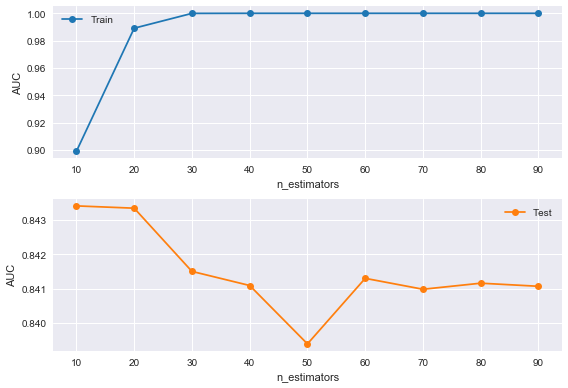

In [33]:
plt.style.use('seaborn')
plt.subplot(2,1,1)
plt.plot(np.arange(10,100,10), scan_train_n70, '-o', label='Train', c='tab:blue')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()

plt.subplot(2,1,2)
plt.plot(np.arange(10,100,10), scan_test_n70, '-o', label='Test', c='tab:orange')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout();

### iv. Training with best hyper-parameters

In [34]:
# Build the ML model with the optimized n_estimators and max_depth

rf = RandomForestClassifier(n_estimators=70, max_depth=10, random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

### v. Evaluate model with 10-fold cross validation on the whole training set
* Train score (ROC-AUC) = 0.89 with 0.003 std
* Test score (ROC-AUC) = 0.84 with 0.01 std

In [35]:
# Perform cross validation for a robust evaluation on training set

cv = cross_validate(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=3)

In [36]:
np.median(cv['train_score']), np.std(cv['train_score'])

(0.8915212594598623, 0.003104269836596356)

In [37]:
np.median(cv['test_score']), np.std(cv['test_score'])

(0.8383668115065235, 0.01004222757909506)

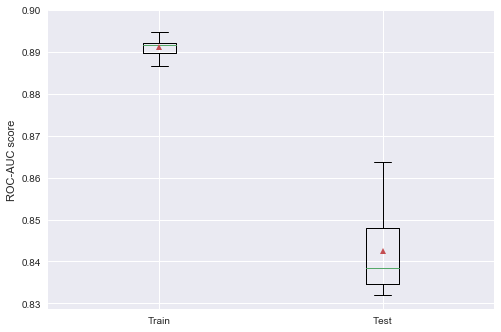

In [38]:
plt.style.use('seaborn')
plt.boxplot([cv['train_score'], cv['test_score']], showmeans=True)
plt.xticks([1, 2], ['Train', 'Test'])
plt.ylabel('ROC-AUC score');

## VI. Evaluate ML model

### i. Features importance
* Top 3 features are
> 1. **time_delta**: Time span between signup time and purchase time
> 2. **purchase_month**: The month of the purchase time
> 3. **user_id_count**: The user number for shared device id
 

In [39]:
df_rf = pd.DataFrame({'Features': X_train.columns.to_list(), 
                     'Importance': rf.feature_importances_})

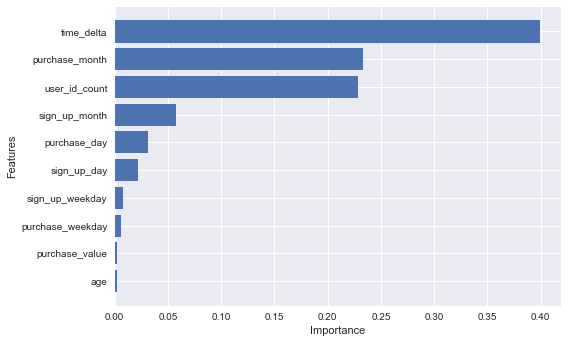

In [40]:
# Top 10 features with high importance

plt.style.use('seaborn')
df_rf_rank10 = df_rf.sort_values(by='Importance', ascending=False).head(10).sort_values(by='Importance', ascending=True)
plt.barh(df_rf_rank10['Features'], df_rf_rank10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features');

### ii. Non-normalized / normalized confusion matrix for test set
* True-positive rate = $ \frac{2296}{2296 + 1987} = 0.54 $ 

* False-postivie rate = $ \frac{0}{0 + 41051} = 0 $




| *Non-normalized*       | Predict 0 | Predict 1 |
| :-------:     | :---: | :----: |
| **Actual 0**  | 41051 (TN) |  0 (FP) |
| **Actual 1**  | 1987 (FN) |  2296 (TP) |


| *Normalized*        | Predict 0 | Predict 1 |
| :-------:     | :---: | :----: |
| **Actual 0**  | 0.9055 (TN) |  0 (FP) |
| **Actual 1**  | 0.0438 (FN) |  0.0506 (TP) |

In [41]:
y_train_pred = rf.predict(X_train)

In [42]:
# training set, without normalizatoin

confusion_matrix(y_train, y_train_pred)

array([[95910,     0],
       [ 4564,  5304]], dtype=int64)

In [43]:
# training set, with normalization

confusion_matrix(y_train, y_train_pred) / y_train.shape[0]

array([[0.90671028, 0.        ],
       [0.04314697, 0.05014275]])

In [44]:
y_test_pred = rf.predict(X_test)

In [45]:
# testing set, without normalization

confusion_matrix(y_test, y_test_pred)

array([[41051,     0],
       [ 1987,  2296]], dtype=int64)

In [46]:
# testing set, with normalization

confusion_matrix(y_test, y_test_pred) / y_test.shape[0]

array([[0.90552345, 0.        ],
       [0.04383024, 0.05064631]])

### iii. Evaluate model with ROC curve
* The AUC of the training ROC curve is 0.89
* The AUC of the testing ROC curve is 0.84

In [47]:
y_train_pred_prob = rf.predict_proba(X_train)
y_test_pred_prob = rf.predict_proba(X_test)

In [48]:
y_train_pred_prob[:,1]

array([0.04190001, 0.04102861, 0.03821813, ..., 0.03685603, 0.90589748,
       0.06334299])

In [49]:
# Create ROC curves for training and testing

fpr_train, tpr_train, thres_train = roc_curve(y_train, y_train_pred_prob[:,1], pos_label=1)
fpr_test, tpr_test, thres_test = roc_curve(y_test, y_test_pred_prob[:,1], pos_label=1)

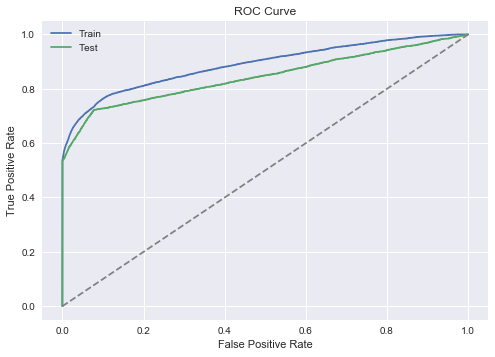

In [50]:
plt.style.use('seaborn')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot([0,1], [0,1], '--', color='gray')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [51]:
# Calculate the AUC of the ROC curves

train_auc = roc_auc_score(y_train, y_train_pred_prob[:,1])
test_auc = roc_auc_score(y_test, y_test_pred_prob[:,1])

In [52]:
'The AUC of the ROC curve for training set is {:.2f}'.format(train_auc)

'The AUC of the ROC curve for training set is 0.89'

In [53]:
'The AUC of the ROC curve for testing set is {:.2f}'.format(test_auc)

'The AUC of the ROC curve for testing set is 0.84'

### iv. What kind of user are more likely to be classified as at risk
* Time delta between sin-up and purchase ~ 1s
* Purchase at January
* Use shared device

In [54]:
top3 = ['time_delta', 'purchase_month', 'user_id_count']

In [55]:
df_test_top3 = X_test[top3]
df_test_top3['prediction'] = y_test_pred
df_test_top3.head()

,time_delta,purchase_month,user_id_count,prediction
46274,7302157.0,6,1,0
22033,10097320.0,10,2,0
8047,4660586.0,5,1,0
11476,9497704.0,8,1,0
86375,7804072.0,8,1,0


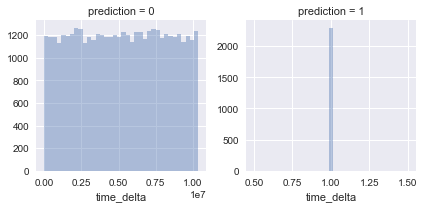

In [56]:
# Compare the patterns on time delta

g = sns.FacetGrid(df_test_top3, col="prediction", sharex=False, sharey=False)
g.map(sns.distplot, 'time_delta', kde=False)

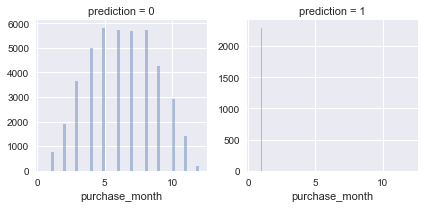

In [57]:
# Compare the patterns on purchase month

g = sns.FacetGrid(df_test_top3, col="prediction", sharey=False)
g.map(sns.distplot, 'purchase_month', kde=False)

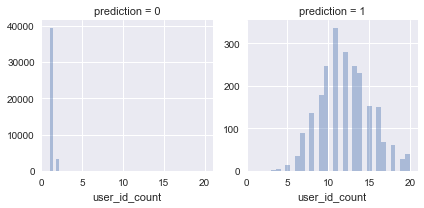

In [58]:
# Compare the patterns on user id count

g = sns.FacetGrid(df_test_top3, col="prediction", sharey=False)
g.map(sns.distplot, 'user_id_count', kde=False)